In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from numpy.linalg import inv

data = pd.read_csv("noisysine.csv")
X = data.drop('y', axis=1).as_matrix()
y = data['y'].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [73]:
class LinearRegression:
    def __init__(self, degree):
        self.deg = degree
        self.w = None
    
    def fit(self, X, y):
        X_tmp = PolynomialFeatures(self.deg).fit_transform(X)
        X_t = X_tmp.transpose()
        pseudo_inv = inv(np.dot(X_t, X_tmp))
        self.w = np.dot(np.dot(pseudo_inv, X_t), y)
    
    def predict(self, X):
        X_tmp = PolynomialFeatures(self.deg).fit_transform(X)
        return np.dot(X_tmp, self.w)
    
def draw_line(X, y, weights):
    plt.rcParams['figure.figsize'] = (10.0, 10.0)
    plt.figure()

    plt.scatter(X, y, color='k')

    k, b = weights[1], weights[0]
    x = np.linspace(np.min(X), np.max(X))

    plt.plot(x, k * x + b, 'g')
    plt.show()

In [74]:
def run():
    lr = LinearRegression(1)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print("R2 score " + str(r2_score(y_test, y_pred)))
    draw_line(X, y, lr.w)

# LinearRegression

R2 score 0.185341175511


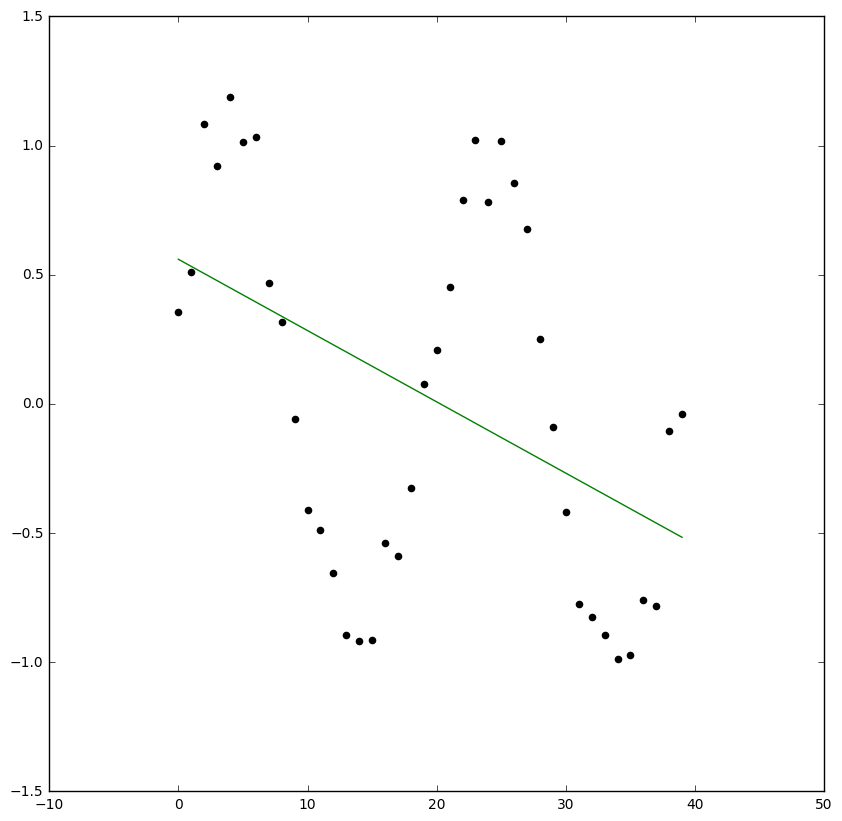

In [75]:
run()

In [76]:
def results(X_train, y_train, X_test, y_test, degrees):
    for deg in degrees:
        lr = LinearRegression(degree=deg)
        lr.fit(X_train, y_train)

        y_pred = lr.predict(X_test)
        print("Degree = " + str(deg) + \
              "\t R2 score: " + str(r2_score(y_test, y_pred)))

    
def results_n_curves(X, y, X_train, y_train, X_test, y_test, degrees):
    x_min = np.min(X)
    plt.rcParams['figure.figsize'] = (10.0, 10.0)
    plt.figure()
    plt.scatter(X, y, color='k')
    x_min = np.min(X)
    x_max = np.max(X)

    labels = []
    scores = []
    for deg in degrees:
        lr = LinearRegression(degree=deg)
        lr.fit(X_train, y_train)

        y_pred = lr.predict(X_test)
        scores.append("Degree = " + str(deg) + \
              "\t R2 score: " + str(r2_score(y_test, y_pred)))

        x = np.linspace(x_min, x_max, 100)
        x = np.reshape(x, newshape=(x.shape[0], 1))

        x_ = PolynomialFeatures(deg).fit_transform(x)

        plt.plot(x, np.dot(x_, lr.w))
        labels.append('degree = ' + str(deg))

    plt.legend(labels)
    plt.show()
    for i in scores:
        print(i)

# PolynomialRegression

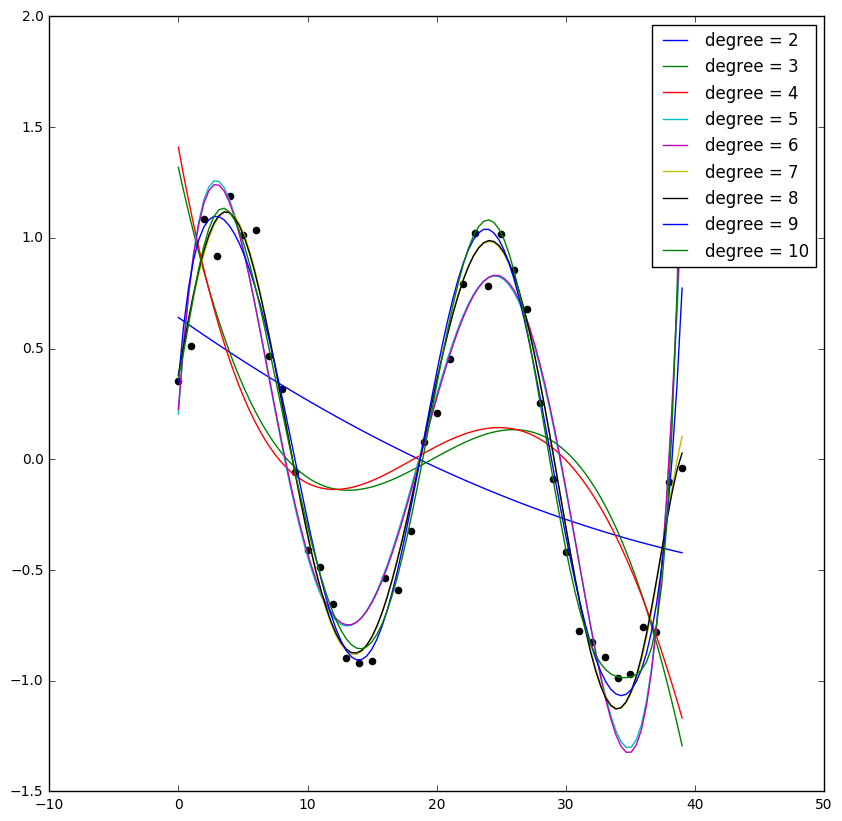

Degree = 2	 R2 score: 0.188048139182
Degree = 3	 R2 score: 0.0756393258887
Degree = 4	 R2 score: 0.12688501737
Degree = 5	 R2 score: 0.558949416843
Degree = 6	 R2 score: 0.519454614613
Degree = 7	 R2 score: 0.949946942669
Degree = 8	 R2 score: 0.952758319913
Degree = 9	 R2 score: 0.787460874735
Degree = 10	 R2 score: 0.360034506863


In [77]:
results_n_curves(X, y, X_train, y_train, X_test, y_test, range(2, 11))

In [78]:
hydro = pd.read_csv('hydrodynamics.csv')
X_hydro = hydro.drop('y', axis=1)
y_hydro = hydro['y']
X_h_train, X_h_test, y_h_train, y_h_test = train_test_split(X_hydro, y_hydro, test_size=0.3)

# hydrodynamics. degree = 2

In [79]:
results(X_h_train, y_h_train, X_h_test, y_h_test, range(2, 3))

Degree = 2	 R2 score: 0.91290546618
